LOADING THE IMPORTANT LIBRARIES

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split



# Stops warnings from showing (happens with a couple of plots)
import warnings
warnings.simplefilter('ignore')

# DATA MANIPULATION AND CLEANING
### GETTING OUR DATASET AND VIEWING THE STRUCTURE


In [4]:
column_names = ["age", "job", "marital", "education", "default", "housing", "loan", "contact", "month",
                "day_of_week", "duration", "campaign", "pdays", "previous", "poutcome",
                "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y"]
#Importing Dataset
BankMarketing = pd.read_csv(r"C:\Users\johnf\Documents\BUSINESS DATA ANALYTICS\CODING FOR BUSINESS APPLICATION\ASSESSMENT\bank-additional-full.csv", sep=';', header=None, names=column_names, skiprows=1, quoting=3)
# Remove double quotation marks from 'age' column
BankMarketing['age'] = BankMarketing['age'].str.replace('"', '')
# Remove double quotation marks from selected columns
columns_to_clean = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
BankMarketing[columns_to_clean] = BankMarketing[columns_to_clean].apply(lambda x: x.str.replace('"', ''))


# Convert 'age' column to integer
BankMarketing['age'] = pd.to_numeric(BankMarketing['age'], errors='coerce').astype('Int64')

# Convert 'duration', 'campaign', 'pdays', 'previous' to integer
columns_to_convert_to_int = ['duration', 'campaign', 'pdays', 'previous']
BankMarketing[columns_to_convert_to_int] = BankMarketing[columns_to_convert_to_int].astype(int)

# Convert 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed' to float
columns_to_convert_to_float = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
BankMarketing[columns_to_convert_to_float] = BankMarketing[columns_to_convert_to_float].astype(float)

#Days Mapping
days_mapping = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5}

BankMarketing['day_of_week'] = BankMarketing['day_of_week'].map(days_mapping).astype('int64')




In [5]:
# Get a feel for the data
print(BankMarketing.head())
print()
print(BankMarketing.tail())
print()
print(BankMarketing.info())
print()

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month  day_of_week  ...  campaign  pdays  previous     poutcome  \
0   may            1  ...         1    999         0  nonexistent   
1   may            1  ...         1    999         0  nonexistent   
2   may            1  ...         1    999         0  nonexistent   
3   may            1  ...         1    999         0  nonexistent   
4   may            1  ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          1.1          93.994          -36.4      4

In [6]:
# Check for missing values in the entire DataFrame
missing_values = BankMarketing.isnull().sum()

# Display the count of missing values for each column
print("Missing values per column:")
print(missing_values)




Missing values per column:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [7]:
# Drop rows with missing values
cleanBankMarketing = BankMarketing.dropna(axis=0)

# Display the updated DataFrame info
print(cleanBankMarketing.info())

# ReCheck for missing values in the entire DataFrame
missing_values = cleanBankMarketing.isnull().sum()

# Display the count of missing values for each column
print("Missing values per column:")
print(missing_values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  Int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  int32  
 11  campaign        41188 non-null  int32  
 12  pdays           41188 non-null  int32  
 13  previous        41188 non-null  int32  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
#Summary Statistics
print(cleanBankMarketing.describe())
#Exploring Unique values in categorical columns
for column in cleanBankMarketing.select_dtypes(include='object').columns:
    print(f"Unique values in {column}: {cleanBankMarketing[column].unique()}")


            age   day_of_week      duration      campaign         pdays  \
count   41188.0  41188.000000  41188.000000  41188.000000  41188.000000   
mean   40.02406      2.979581    258.285010      2.567593    962.475454   
std    10.42125      1.411514    259.279249      2.770014    186.910907   
min        17.0      1.000000      0.000000      1.000000      0.000000   
25%        32.0      2.000000    102.000000      1.000000    999.000000   
50%        38.0      3.000000    180.000000      2.000000    999.000000   
75%        47.0      4.000000    319.000000      3.000000    999.000000   
max        98.0      5.000000   4918.000000     56.000000    999.000000   

           previous  emp.var.rate  cons.price.idx  cons.conf.idx  \
count  41188.000000  41188.000000    41188.000000   41188.000000   
mean       0.172963      0.081886       93.575664     -40.502600   
std        0.494901      1.570960        0.578840       4.628198   
min        0.000000     -3.400000       92.201000   

DATA VISUALISATION

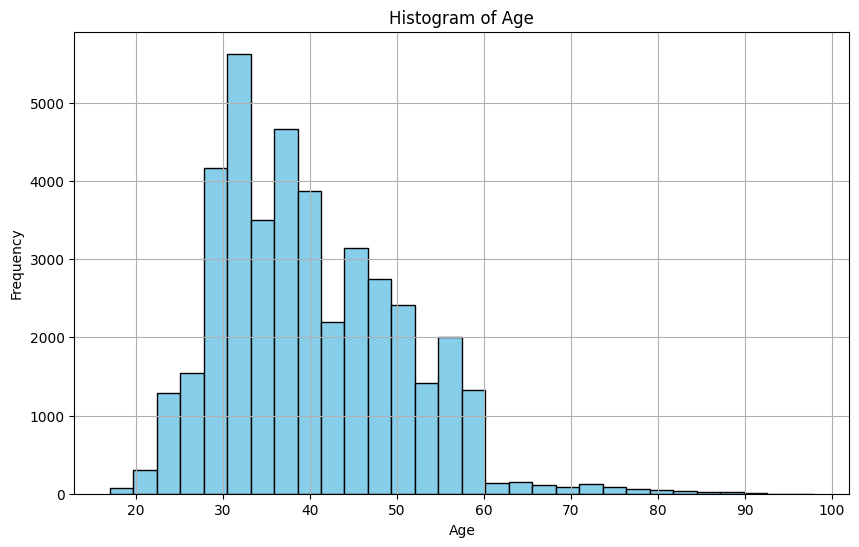

In [9]:
# Plot histogram for the 'age' column
cleanBankMarketing['age'].hist(figsize=(10, 6), bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### DATA SAMPLING

In [10]:
# Set a random seed for reproducibility
random_seed = 42

# Randomly sample 20% of the data
sampled_BankMarketing = cleanBankMarketing.sample(frac=0.2, random_state=random_seed)

# Display information about the sampled data
print("Original Data Shape:", cleanBankMarketing.shape)
print("Sampled Data Shape:", sampled_BankMarketing.shape)

Original Data Shape: (41188, 21)
Sampled Data Shape: (8238, 21)


### CORRELATION MATRIX AND DATA VISUALISATION

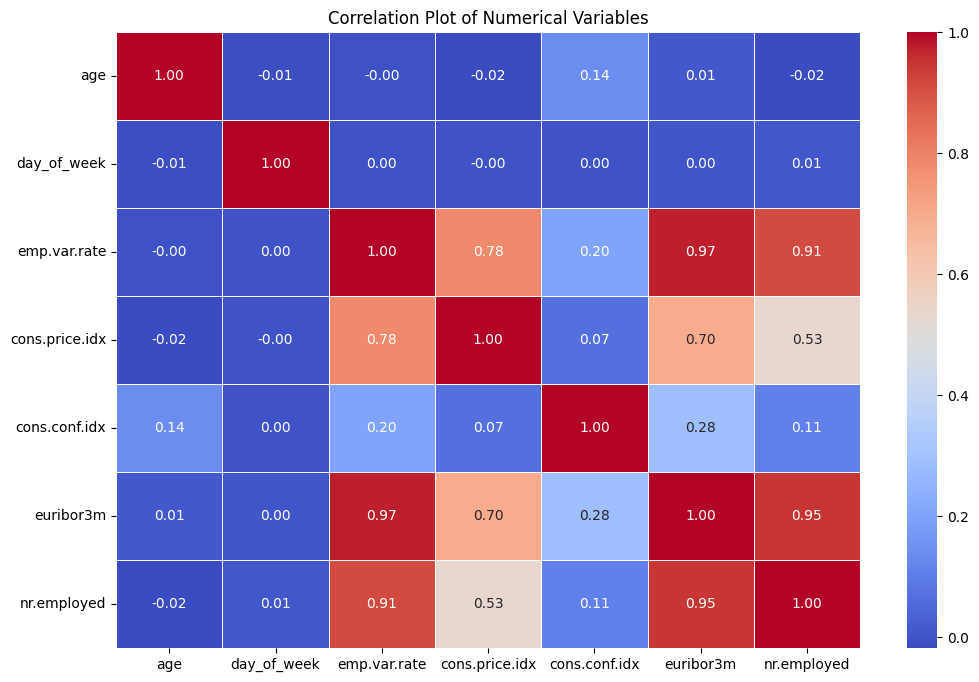

In [11]:
# select only the numeric columns
numeric_columns = sampled_BankMarketing.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Show the plot
plt.title('Correlation Plot of Numerical Variables')
plt.show()

### CATEGORICAL VARIABLE ANALYSIS

In [12]:
categorical_features=[feature for feature in sampled_BankMarketing.columns if ((sampled_BankMarketing[feature].dtypes=='O') & (feature not in ['y']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [13]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(sampled_BankMarketing[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 4
The feature is education and number of categories are 8
The feature is default and number of categories are 2
The feature is housing and number of categories are 3
The feature is loan and number of categories are 3
The feature is contact and number of categories are 2
The feature is month and number of categories are 10
The feature is poutcome and number of categories are 3


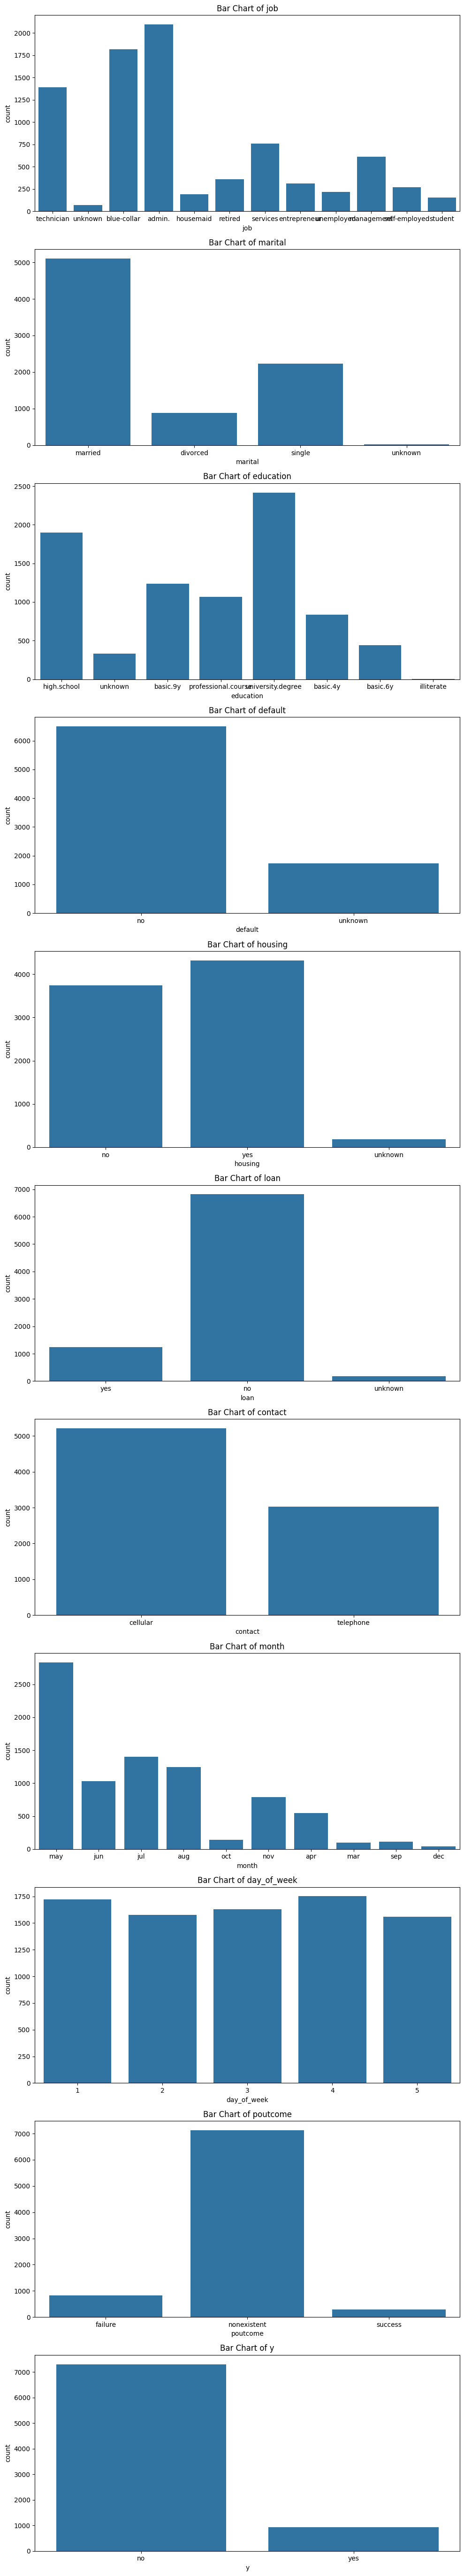

In [14]:
# list of categorical variable names
categorical_variables = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

# Set up subplots
fig, axes = plt.subplots(nrows=len(categorical_variables), ncols=1, figsize=(10, 5 * len(categorical_variables)))

# Plot bar charts for each categorical variable
for i, variable in enumerate(categorical_variables):
    sns.countplot(x=variable, data=sampled_BankMarketing, ax=axes[i])
    axes[i].set_title(f'Bar Chart of {variable}')

# Adjust layout
plt.tight_layout()
plt.show()

### Relationship between Categorical Features and Label

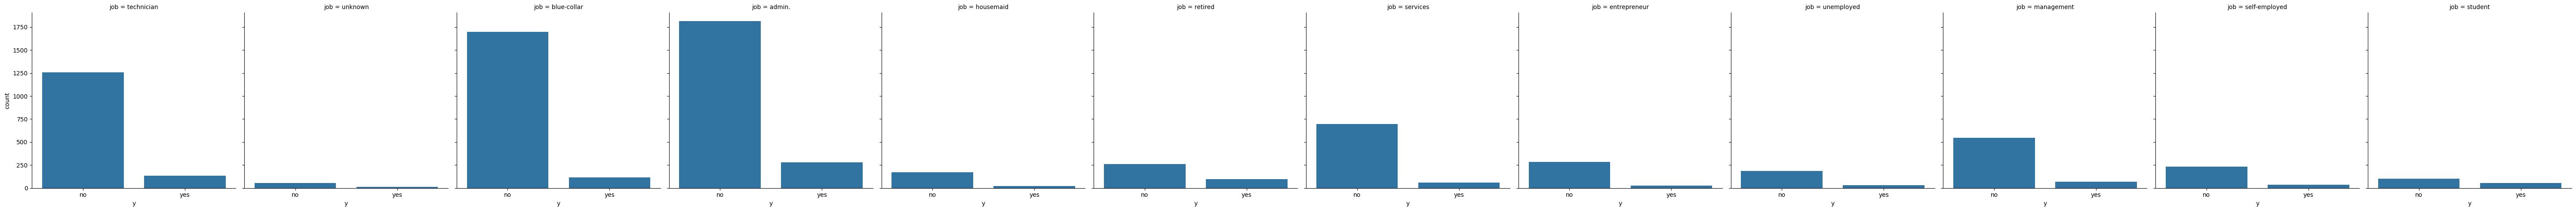

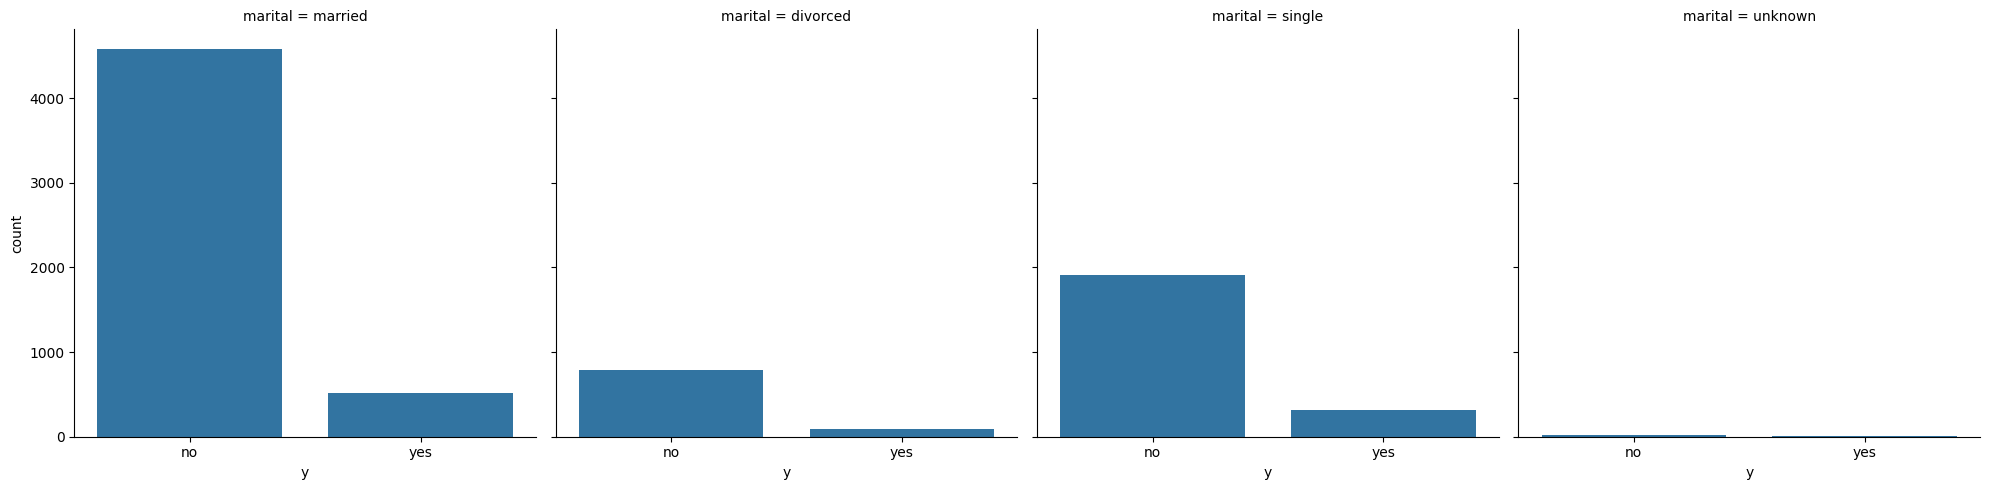

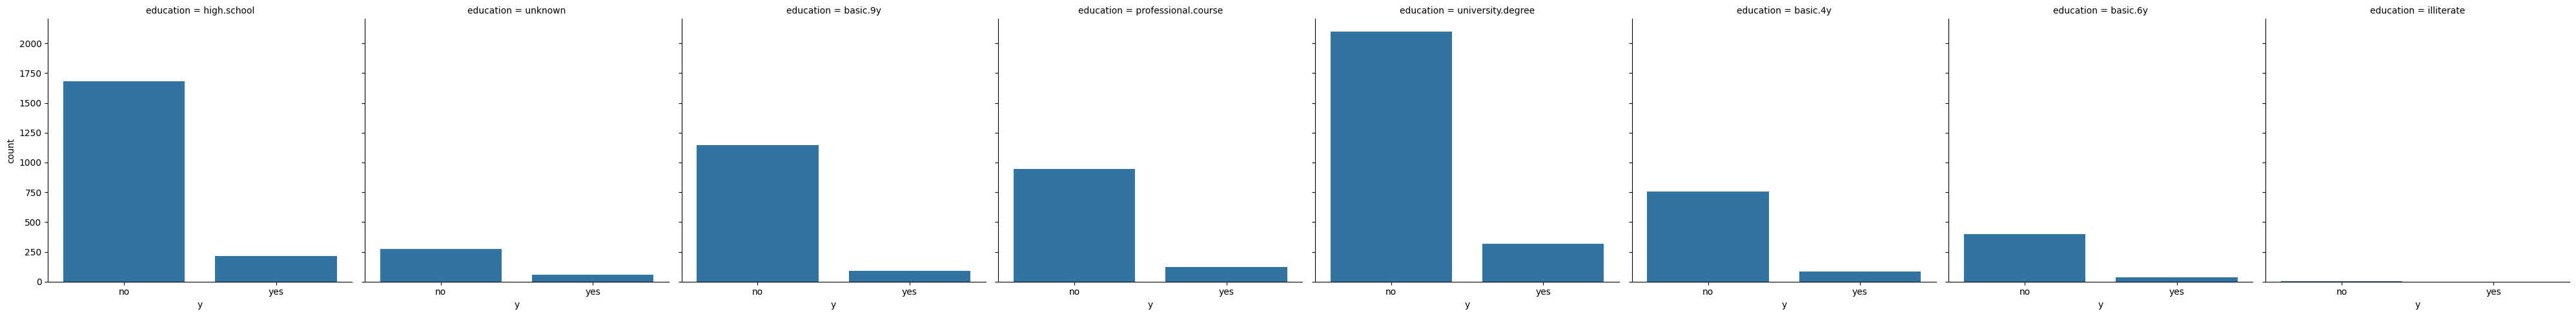

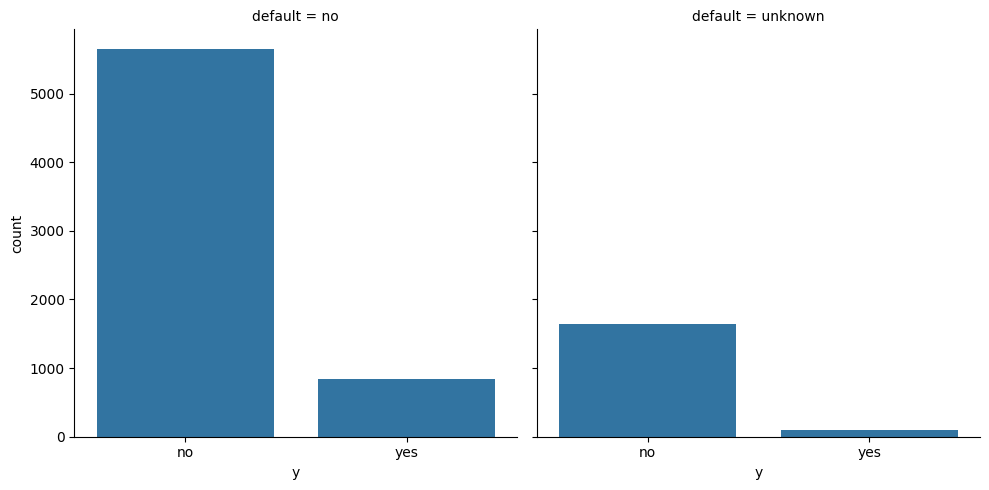

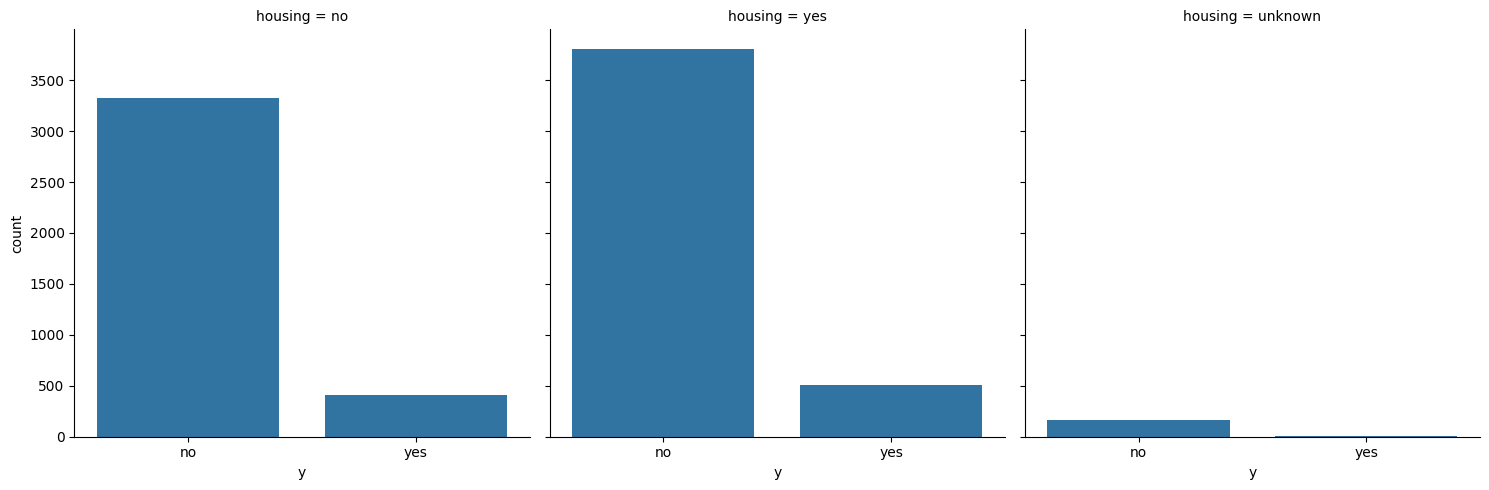

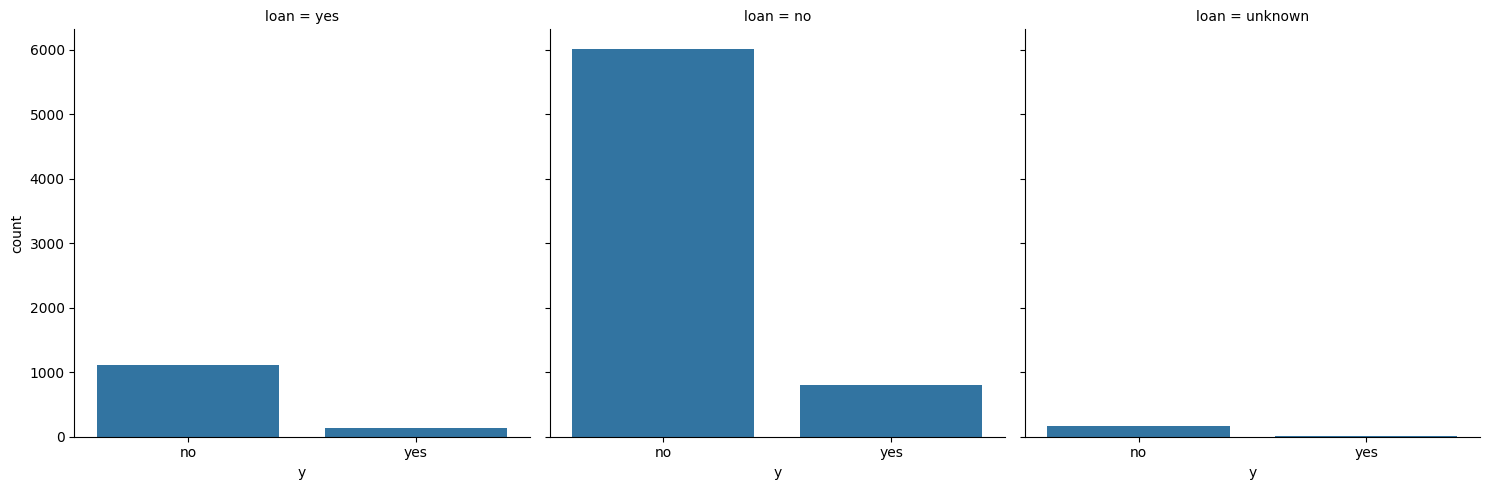

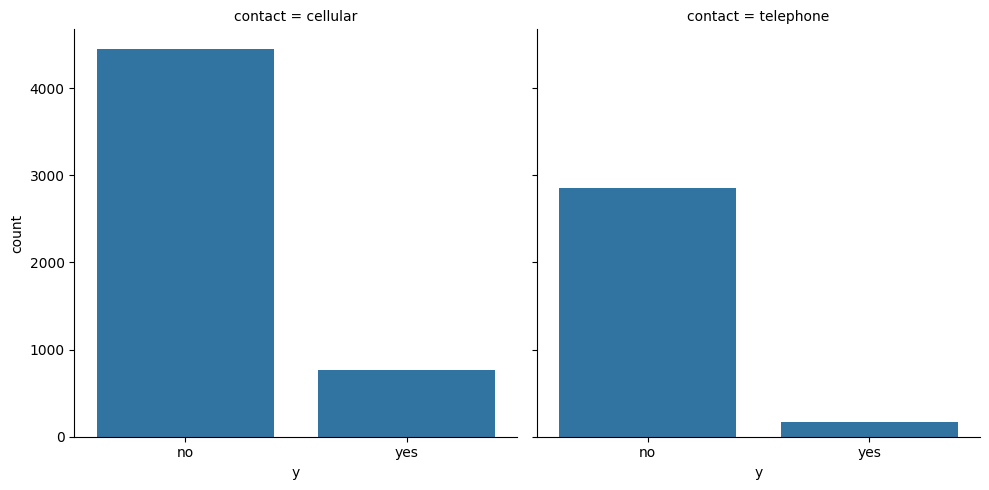

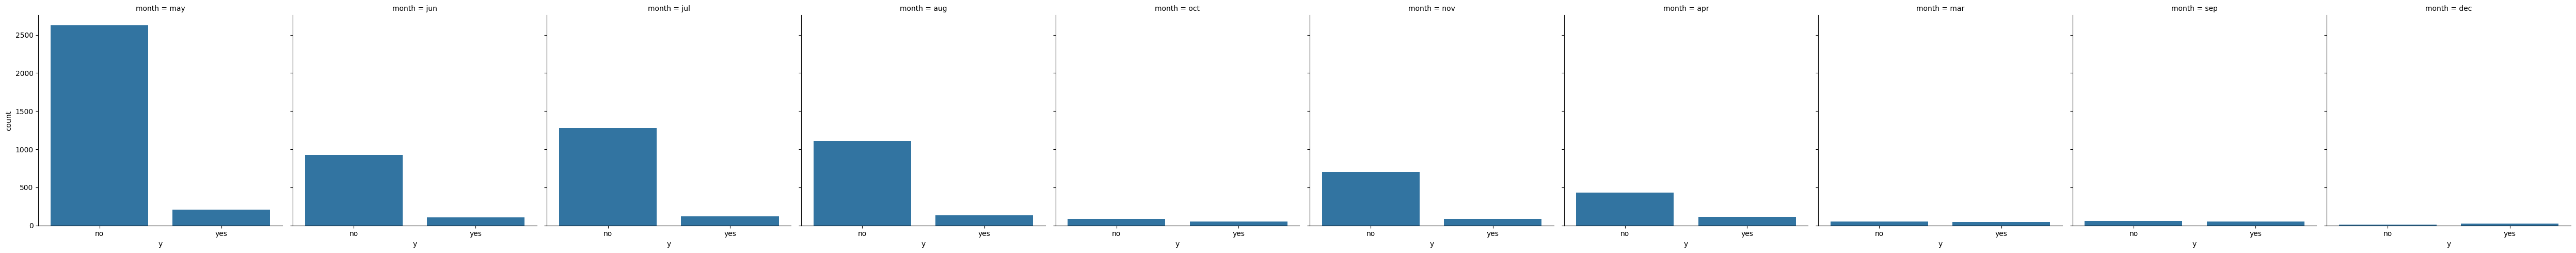

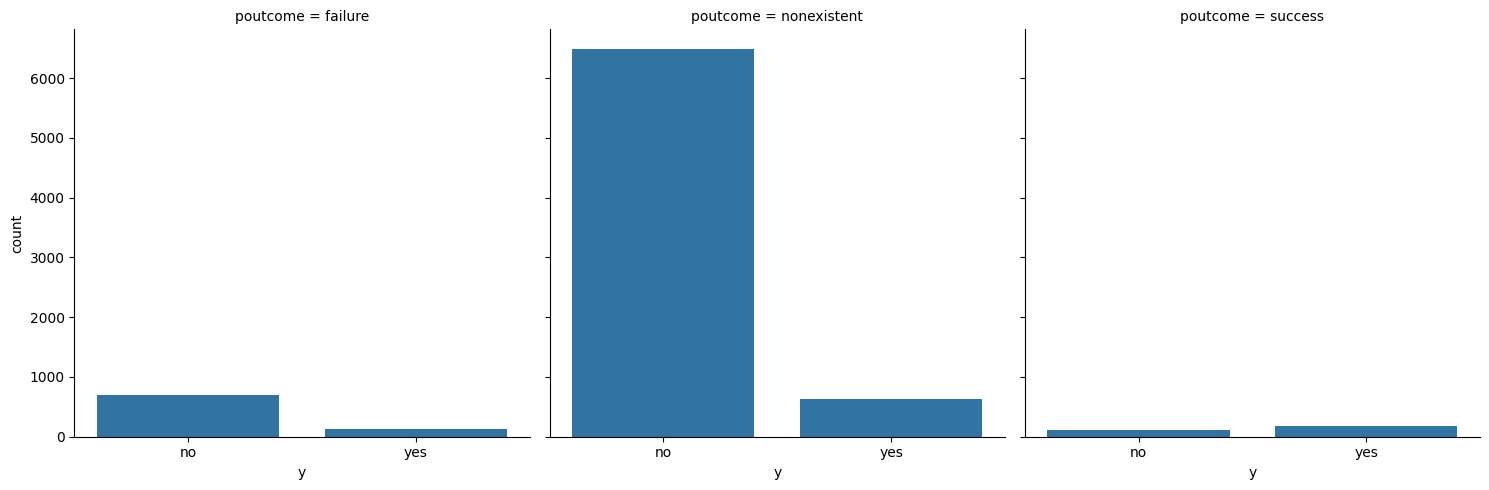

In [15]:
#check target label split over categorical features
#Find out the relationship between categorical variable and dependent variable
for categorical_feature in categorical_features:
    sns.catplot(x='y', col=categorical_feature, kind='count', data= sampled_BankMarketing)
plt.show()

In [16]:
#Check target variable split over categorical features and find the count
for categorical_feature in categorical_features:
    print(sampled_BankMarketing.groupby(['y',categorical_feature]).size())

y    job          
no   admin.           1816
     blue-collar      1697
     entrepreneur      284
     housemaid         170
     management        545
     retired           260
     self-employed     233
     services          698
     student           100
     technician       1258
     unemployed        185
     unknown            57
yes  admin.            278
     blue-collar       118
     entrepreneur       27
     housemaid          23
     management         69
     retired            97
     self-employed      35
     services           59
     student            54
     technician        133
     unemployed         31
     unknown            11
dtype: int64
y    marital 
no   divorced     789
     married     4585
     single      1914
     unknown       15
yes  divorced      90
     married      520
     single       321
     unknown        4
dtype: int64
y    education          
no   basic.4y                755
     basic.6y                401
     basic.9y             

### Explore the Numerical Features

In [17]:
# list of numerical variables
numerical_features = [feature for feature in sampled_BankMarketing.columns if ((sampled_BankMarketing[feature].dtypes != 'O') & (feature not in ['y']))]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
sampled_BankMarketing[numerical_features].head()

Number of numerical variables:  11


,age,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
32884,57,1,371,1,999,1,-1.8,92.893,-46.2,1.299,5099.1
3169,55,4,285,2,999,0,1.1,93.994,-36.4,4.860,5191.0
32206,33,5,52,1,999,1,-1.8,92.893,-46.2,1.313,5099.1
9403,36,5,355,4,999,0,1.4,94.465,-41.8,4.967,5228.1
14020,27,5,189,2,999,0,1.4,93.918,-42.7,4.963,5228.1


### Checking for Discrete and Continuous Variables

In [20]:
discrete_features=[feature for feature in numerical_features if len(sampled_BankMarketing[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_features)))

Discrete Variables Count: 5


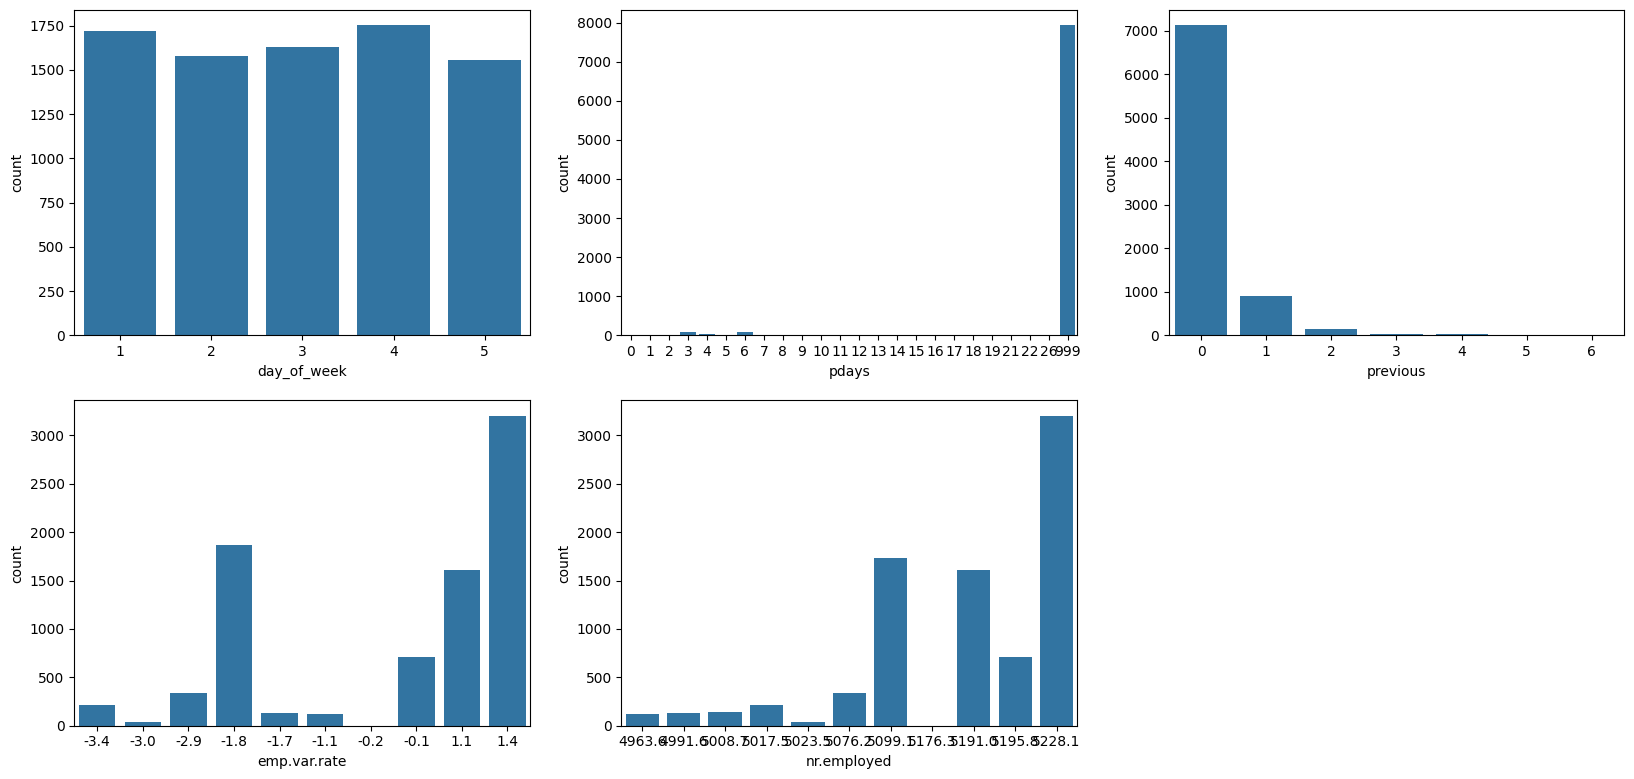

In [21]:
plt.figure(figsize=(20, 60), facecolor='white')
plotnumber = 1

for discrete_feature in discrete_features:
    ax = plt.subplot(12, 3, plotnumber)
    sns.countplot(x=sampled_BankMarketing[discrete_feature])
    plt.xlabel(discrete_feature)
    plotnumber+= 1

plt.show()

In [23]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_features+['y']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 6


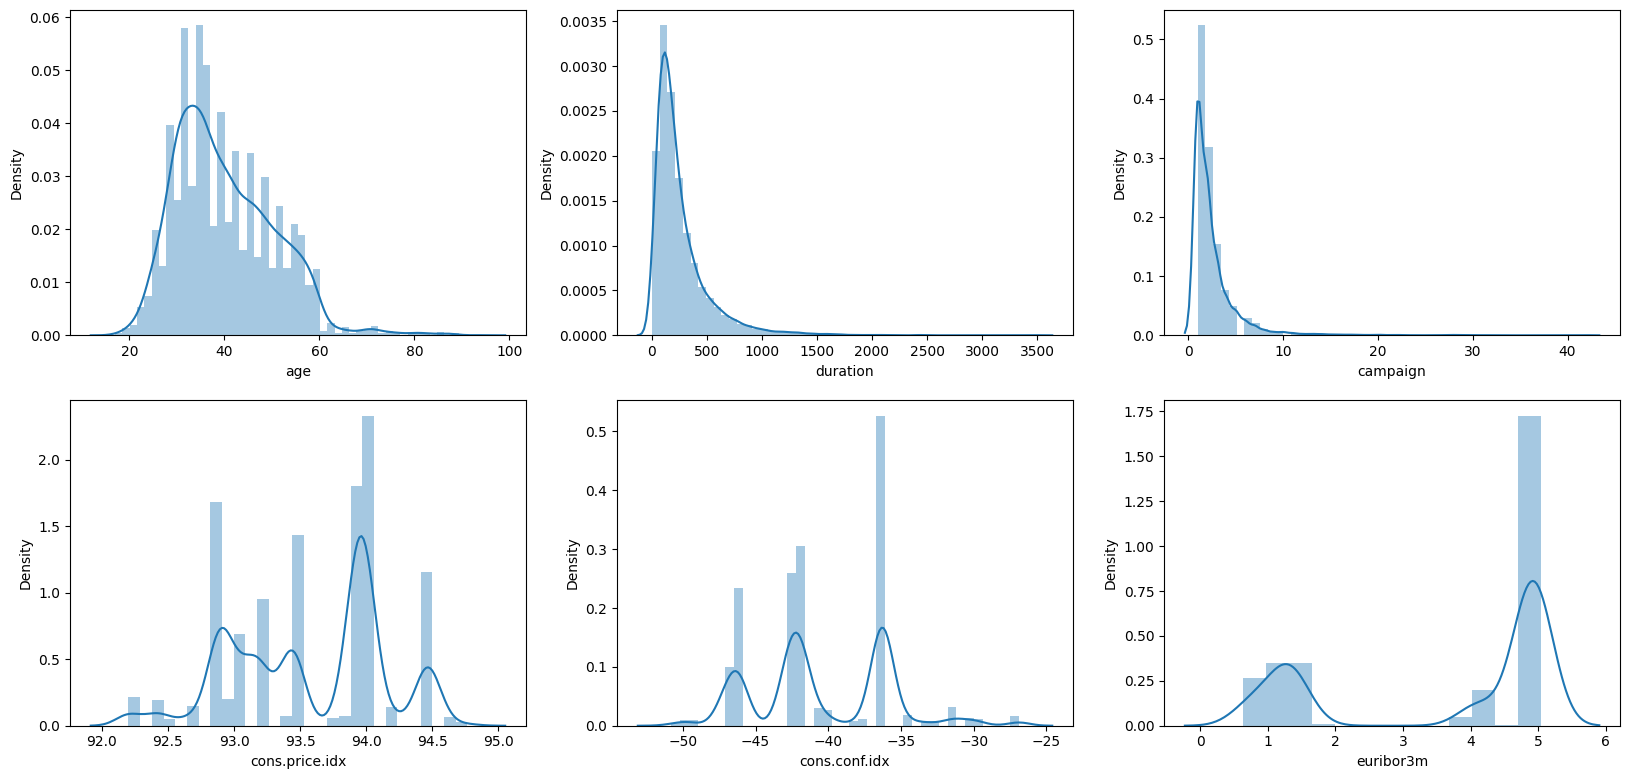

In [24]:
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(sampled_BankMarketing[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

### Relationship Between numerical features and Target variable

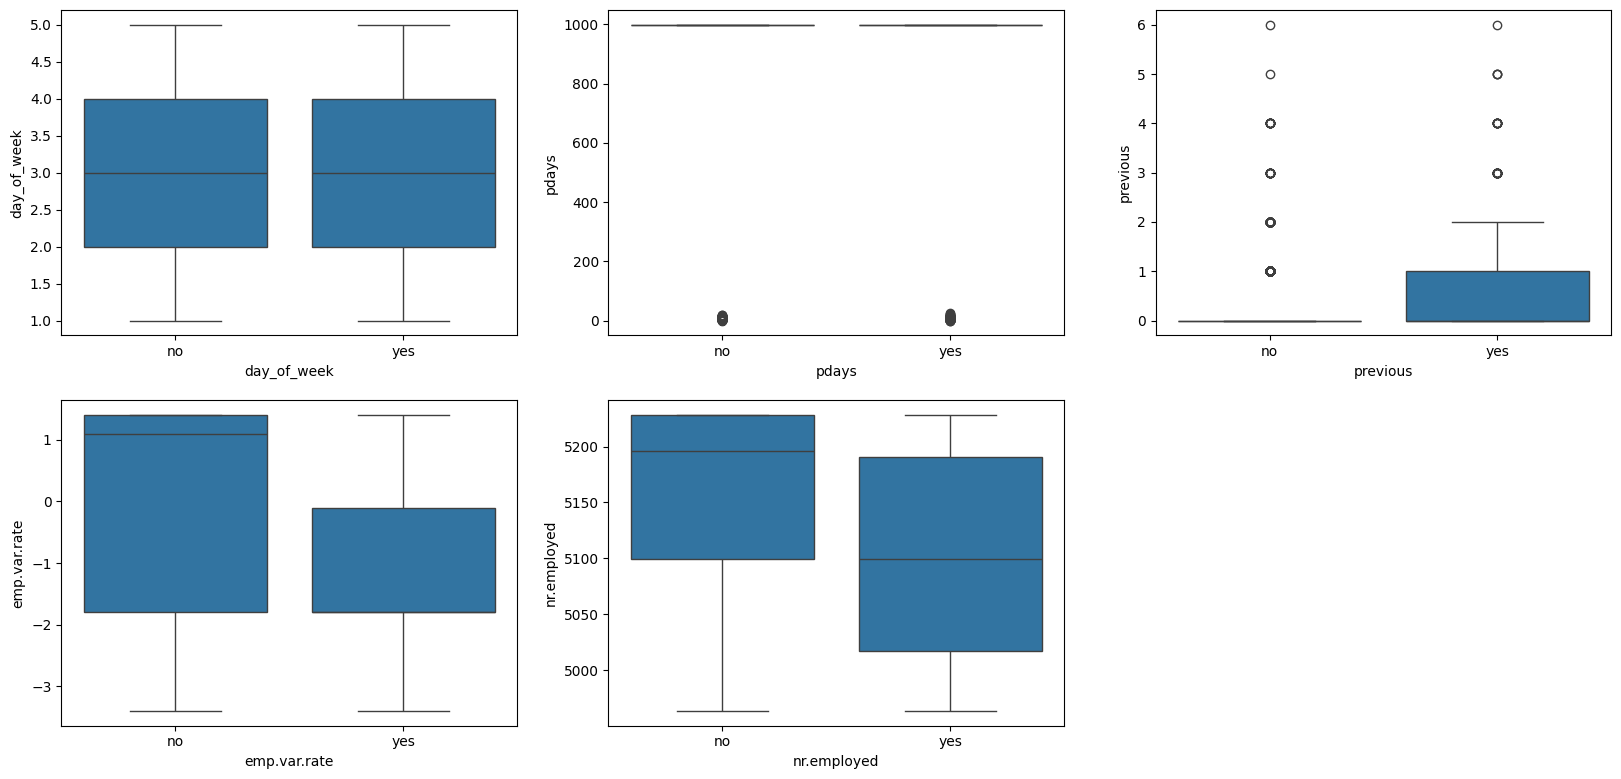

In [25]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in discrete_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="y", y= sampled_BankMarketing[feature], data=sampled_BankMarketing)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()


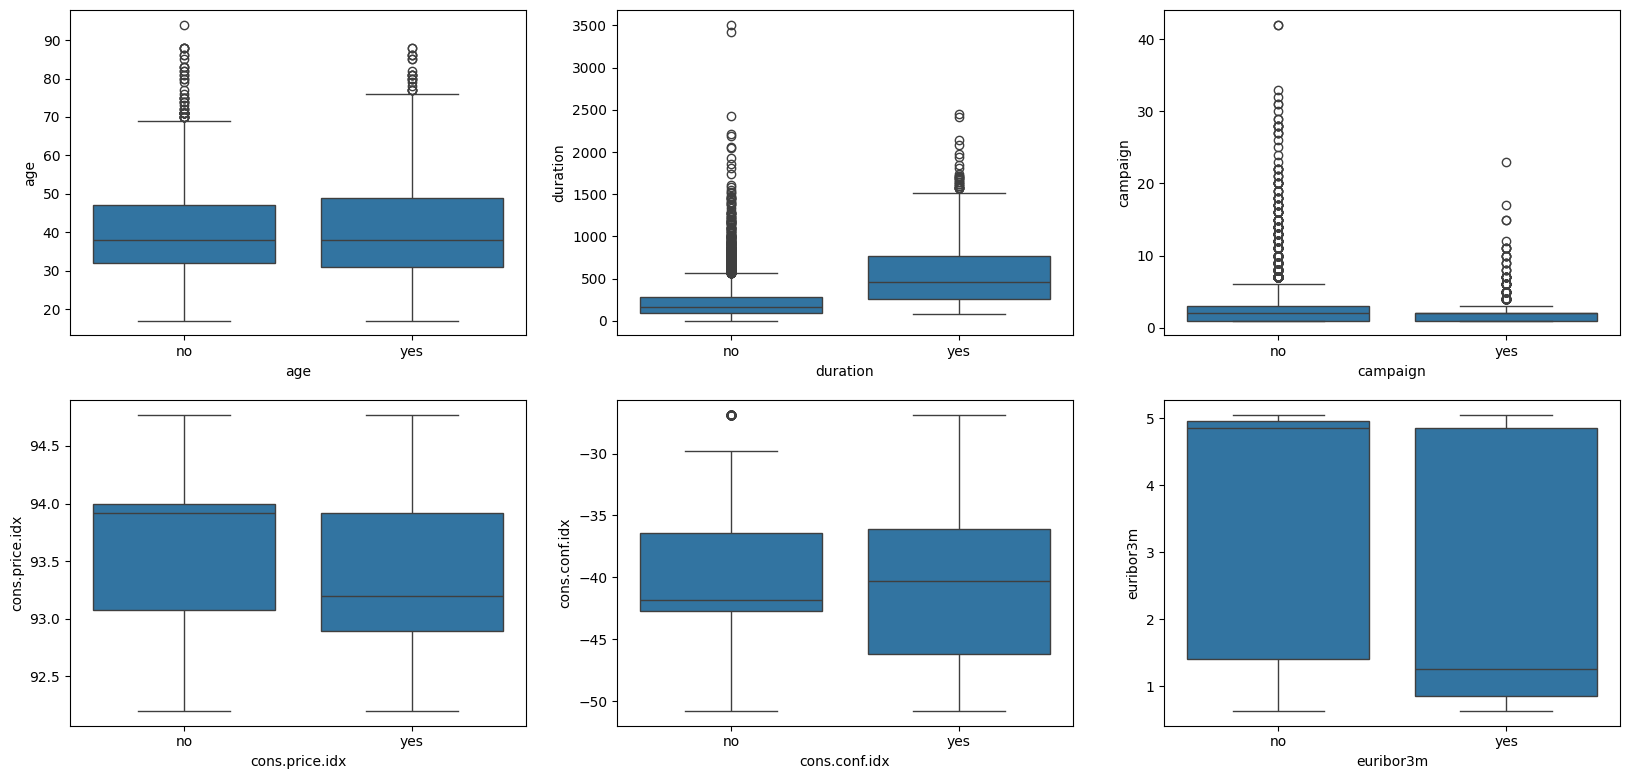

In [26]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="y", y= sampled_BankMarketing[feature], data=sampled_BankMarketing)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

### Find Outliers in numerical features

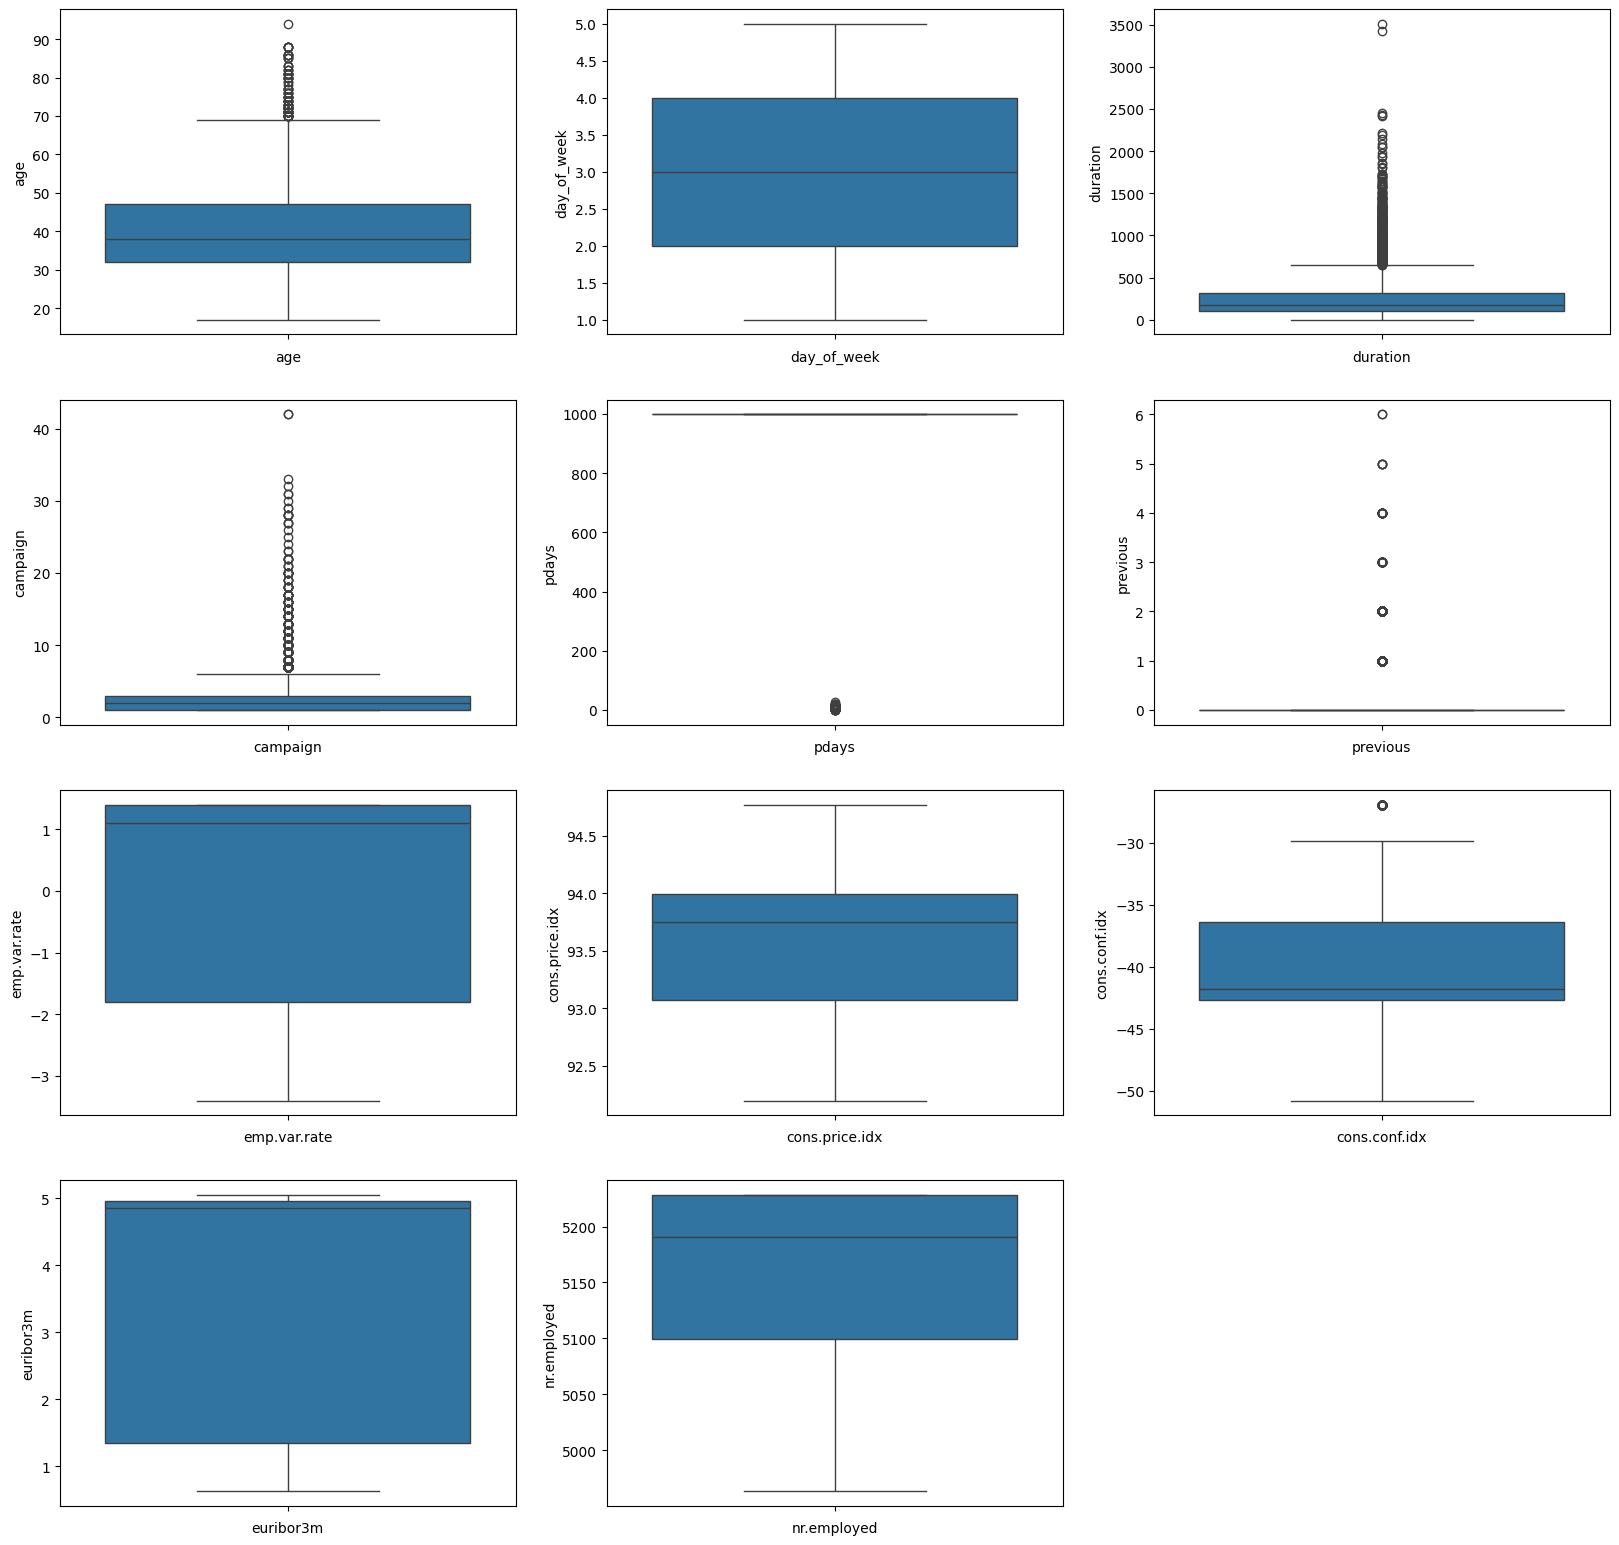

In [27]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(sampled_BankMarketing[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

### Explore the Correlation between numerical features

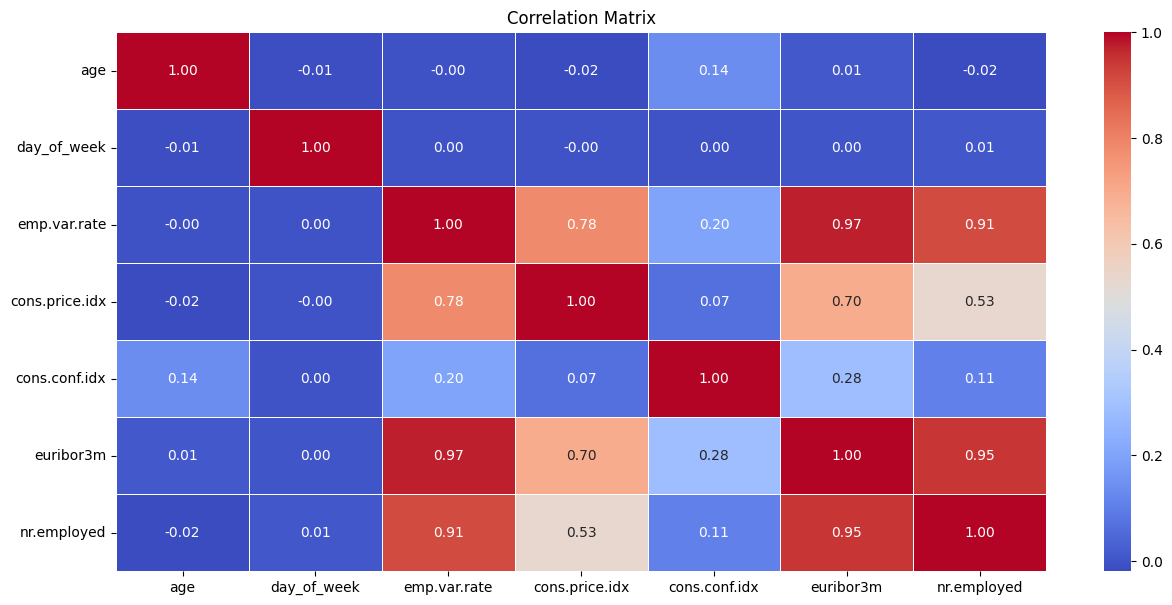

In [28]:
## Checking for correlation
numeric_columns = sampled_BankMarketing.select_dtypes(include=['int64', 'float64']).columns
cor_mat = sampled_BankMarketing[numeric_columns].corr()

fig = plt.figure(figsize=(15, 7))
sns.heatmap(cor_mat, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


### Check the Data set is balanced or not based on target values in classification

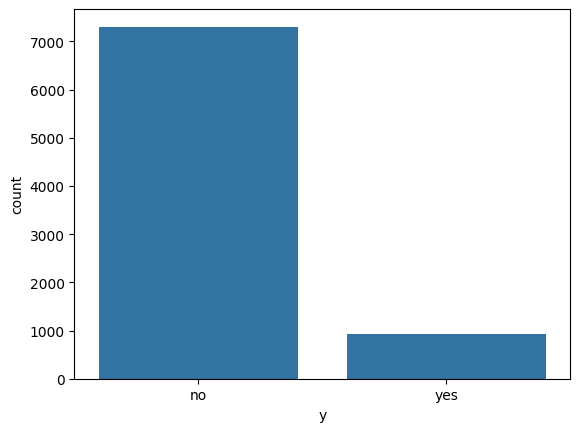

In [29]:
#total client count based on Deposit Variable Y
sns.countplot(x='y',data=sampled_BankMarketing)
plt.show()

In [30]:
sampled_BankMarketing['y'].groupby(sampled_BankMarketing['y']).count()

y
no     7303
yes     935
Name: y, dtype: int64

In [31]:
sampled_BankMarketing.dtypes

age                 Int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week         int64
duration            int32
campaign            int32
pdays               int32
previous            int32
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [32]:
def print_unique_col_values(sampled_BankMarketing):
       for column in sampled_BankMarketing:
            if sampled_BankMarketing[column].dtypes=='object':
                print(f'{column}: {sampled_BankMarketing[column].unique()}') 

In [33]:
print_unique_col_values(sampled_BankMarketing)

job: ['technician' 'unknown' 'blue-collar' 'admin.' 'housemaid' 'retired'
 'services' 'entrepreneur' 'unemployed' 'management' 'self-employed'
 'student']
marital: ['married' 'divorced' 'single' 'unknown']
education: ['high.school' 'unknown' 'basic.9y' 'professional.course'
 'university.degree' 'basic.4y' 'basic.6y' 'illiterate']
default: ['no' 'unknown']
housing: ['no' 'yes' 'unknown']
loan: ['yes' 'no' 'unknown']
contact: ['cellular' 'telephone']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'apr' 'mar' 'sep' 'dec']
poutcome: ['failure' 'nonexistent' 'success']
y: ['no' 'yes']


In [34]:
# Drop rows with 'unknown' values in 'default' and 'housing'
sampled_BankMarketing1 = sampled_BankMarketing[(sampled_BankMarketing['default'] != 'unknown') & (sampled_BankMarketing['housing'] != 'unknown')]

# Resetting the index after dropping rows
sampled_BankMarketing1.reset_index(drop=True, inplace=True)


In [35]:
print_unique_col_values(sampled_BankMarketing1)

job: ['technician' 'blue-collar' 'admin.' 'housemaid' 'retired' 'entrepreneur'
 'self-employed' 'services' 'management' 'student' 'unemployed' 'unknown']
marital: ['married' 'divorced' 'single' 'unknown']
education: ['high.school' 'basic.9y' 'professional.course' 'university.degree'
 'basic.4y' 'basic.6y' 'unknown' 'illiterate']
default: ['no']
housing: ['no' 'yes']
loan: ['yes' 'no']
contact: ['cellular' 'telephone']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'mar' 'sep' 'apr' 'dec']
poutcome: ['failure' 'nonexistent' 'success']
y: ['no' 'yes']


### Converting 'NO' and 'YES' columns to '0' and '1'

In [36]:
yes_no_columns = ['default', 'housing', 'loan', 'y']

for col in yes_no_columns:
    sampled_BankMarketing1[col].replace({'yes': 1, 'no': 0}, inplace=True)


In [37]:
for col in  sampled_BankMarketing:
    print(f'{col}: { sampled_BankMarketing1[col].unique()}') 

age: <IntegerArray>
[57, 33, 36, 27, 58, 24, 34, 42, 43, 56, 53, 37, 46, 30, 45, 31, 69, 26, 41,
 50, 25, 55, 39, 44, 63, 52, 35, 77, 32, 28, 40, 60, 29, 49, 38, 54, 47, 59,
 51, 81, 48, 70, 21, 22, 74, 80, 61, 68, 23, 71, 67, 65, 20, 19, 62, 66, 75,
 18, 72, 85, 88, 83, 78, 64, 17, 76, 73, 86, 79, 82, 94]
Length: 71, dtype: Int64
job: ['technician' 'blue-collar' 'admin.' 'housemaid' 'retired' 'entrepreneur'
 'self-employed' 'services' 'management' 'student' 'unemployed' 'unknown']
marital: ['married' 'divorced' 'single' 'unknown']
education: ['high.school' 'basic.9y' 'professional.course' 'university.degree'
 'basic.4y' 'basic.6y' 'unknown' 'illiterate']
default: [0]
housing: [0 1]
loan: [1 0]
contact: ['cellular' 'telephone']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'mar' 'sep' 'apr' 'dec']
day_of_week: [1 5 3 4 2]
duration: [ 371   52  355  189  605  126   43  451  560  982  552  265  171  178
   92  399  101   60    9  119  140  649  911  835   49  289   94  201
   72    2  234 

In [38]:
print(sampled_BankMarketing1.head())

   age          job  marital            education  default  housing  loan  \
0   57   technician  married          high.school        0        0     1   
1   33  blue-collar  married             basic.9y        0        0     0   
2   36       admin.  married          high.school        0        0     0   
3   27    housemaid  married          high.school        0        1     0   
4   58      retired  married  professional.course        0        1     1   

     contact month  day_of_week  ...  campaign  pdays  previous     poutcome  \
0   cellular   may            1  ...         1    999         1      failure   
1   cellular   may            5  ...         1    999         1      failure   
2  telephone   jun            5  ...         4    999         0  nonexistent   
3   cellular   jul            5  ...         2    999         0  nonexistent   
4   cellular   jul            5  ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m

In [39]:
## Converting The Contact method into binary
sampled_BankMarketing1['contact'].replace({'cellular':1,'telephone':0},inplace=True)
sampled_BankMarketing1.contact.unique()

array([1, 0], dtype=int64)

### encoding for categorical columns

In [40]:
sampled_BankMarketing2= pd.get_dummies(data=sampled_BankMarketing1, columns=['marital','job','education','month','poutcome'])
sampled_BankMarketing2.columns

Index(['age', 'default', 'housing', 'loan', 'contact', 'day_of_week',
       'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')

In [41]:
sampled_BankMarketing2.sample(5)

,age,default,housing,loan,contact,day_of_week,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success
5590,27,0,1,0,1,1,313,1,999,1,...,False,False,False,True,False,False,False,True,False,False
2805,29,0,1,0,1,3,112,3,999,0,...,True,False,False,False,False,False,False,False,True,False
816,38,0,0,0,0,2,287,4,999,0,...,False,False,False,True,False,False,False,False,True,False
2682,55,0,1,0,1,5,122,1,999,0,...,False,False,False,False,False,False,False,False,True,False
5847,36,0,1,0,1,1,200,2,4,1,...,False,False,False,False,True,False,False,False,False,True


In [92]:
unique_age_values = sampled_BankMarketing1['age'].unique()
print(unique_age_values)


<IntegerArray>
[57, 33, 36, 27, 58, 24, 34, 42, 43, 56, 53, 37, 46, 30, 45, 31, 69, 26, 41,
 50, 25, 55, 39, 44, 63, 52, 35, 77, 32, 28, 40, 60, 29, 49, 38, 54, 47, 59,
 51, 81, 48, 70, 21, 22, 74, 80, 61, 68, 23, 71, 67, 65, 20, 19, 62, 66, 75,
 18, 72, 85, 88, 83, 78, 64, 17, 76, 73, 86, 79, 82, 94]
Length: 71, dtype: Int64


In [93]:

# Assuming 'age' is the column containing your age values
bins = [0, 25, 35, 45, 55, 65, 75, 100]  # Define your age group bins as needed
labels = ['0-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-100']  # Labels for the age groups

# Create a new column 'age_group' in your DataFrame
sampled_BankMarketing1['age_group'] = pd.cut(sampled_BankMarketing1['age'], bins=bins, labels=labels, right=False)

# Print the DataFrame with the new 'age_group' column
print(sampled_BankMarketing1[['age', 'age_group']])


      age age_group
0      57     56-65
1      33     26-35
2      36     36-45
3      27     26-35
4      58     56-65
...   ...       ...
6356   36     36-45
6357   41     36-45
6358   46     46-55
6359   31     26-35
6360   59     56-65

[6361 rows x 2 columns]


In [94]:
import statsmodels.api as sm

age_groups = sampled_BankMarketing1['age_group'].unique()

for age_group in age_groups:
    # Subset data for the specific age group
    subset_data = sampled_BankMarketing1[sampled_BankMarketing1['age_group'] == age_group]

    # Create design matrix with contact as a predictor
    X = sm.add_constant(subset_data['contact'])

    # Fit logistic regression model
    logit_model = sm.Logit(subset_data['y'], X)
    result = logit_model.fit()

    # Print summary for each age group
    print(f"\nLogistic Regression Results for Age Group: {age_group}\n")
    print(result.summary())


Optimization terminated successfully.
         Current function value: 0.473782
         Iterations 6

Logistic Regression Results for Age Group: 56-65

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  466
Model:                          Logit   Df Residuals:                      464
Method:                           MLE   Df Model:                            1
Date:                Fri, 05 Jan 2024   Pseudo R-squ.:                 0.03455
Time:                        20:08:39   Log-Likelihood:                -220.78
converged:                       True   LL-Null:                       -228.68
Covariance Type:            nonrobust   LLR p-value:                 7.041e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3102      0.291     -7.945      0.000   

In [42]:
boolean_columns = ['marital_divorced', 'marital_married', 'marital_single', 'marital_unknown',
                    'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management',
                    'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician',
                    'job_unemployed', 'job_unknown', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y',
                    'education_high.school', 'education_illiterate', 'education_professional.course',
                    'education_university.degree', 'education_unknown', 'month_apr', 'month_aug', 'month_dec','month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success']

for col in boolean_columns:
    sampled_BankMarketing2[col] = sampled_BankMarketing2[col].astype(int)


In [43]:
## scaling of columns 
cols_to_scale = ['age','duration','pdays','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sampled_BankMarketing2[cols_to_scale] = scaler.fit_transform(sampled_BankMarketing2[cols_to_scale])

In [44]:
for col in sampled_BankMarketing2:
    print(f'{col}: {sampled_BankMarketing2[col].unique()}')

age: [0.51948052 0.20779221 0.24675325 0.12987013 0.53246753 0.09090909
 0.22077922 0.32467532 0.33766234 0.50649351 0.46753247 0.25974026
 0.37662338 0.16883117 0.36363636 0.18181818 0.67532468 0.11688312
 0.31168831 0.42857143 0.1038961  0.49350649 0.28571429 0.35064935
 0.5974026  0.45454545 0.23376623 0.77922078 0.19480519 0.14285714
 0.2987013  0.55844156 0.15584416 0.41558442 0.27272727 0.48051948
 0.38961039 0.54545455 0.44155844 0.83116883 0.4025974  0.68831169
 0.05194805 0.06493506 0.74025974 0.81818182 0.57142857 0.66233766
 0.07792208 0.7012987  0.64935065 0.62337662 0.03896104 0.02597403
 0.58441558 0.63636364 0.75324675 0.01298701 0.71428571 0.88311688
 0.92207792 0.85714286 0.79220779 0.61038961 0.         0.76623377
 0.72727273 0.8961039  0.80519481 0.84415584 1.        ]
default: [0]
housing: [0 1]
loan: [1 0]
contact: [1 0]
day_of_week: [1 5 3 4 2]
duration: [1.05218135e-01 1.42571999e-02 1.00655831e-01 5.33219276e-02
 1.71941831e-01 3.53578557e-02 1.16909039e-02 1.28

### Train test split

In [45]:
## dropping the target variable
X = sampled_BankMarketing2.drop('y',axis='columns')
y = testLabels = sampled_BankMarketing2.y.astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [48]:
y_train.value_counts()


y
0.0    4421
1.0     667
Name: count, dtype: int64

In [49]:
y.value_counts()

y
0.0    5527
1.0     834
Name: count, dtype: int64

In [50]:
y_test.value_counts()

y
0.0    1106
1.0     167
Name: count, dtype: int64

In [51]:
X_train.shape

(5088, 52)

In [52]:
X_test.shape

(1273, 52)

In [53]:
X_train[:10]

,age,default,housing,loan,contact,day_of_week,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success
5249,0.181818,0,1,0,1,4,0.262903,0.048780,1.000000,0,...,0,0,0,1,0,0,0,0,1,0
1407,0.285714,0,0,0,1,1,0.049045,0.000000,0.003003,1,...,0,0,1,0,0,0,0,0,0,1
3330,0.220779,0,0,0,1,5,0.085258,0.048780,1.000000,0,...,0,0,1,0,0,0,0,0,1,0
2796,0.207792,0,0,0,1,1,0.057884,0.000000,1.000000,0,...,0,0,0,1,0,0,0,0,1,0
5542,0.259740,0,0,0,0,5,0.038209,0.000000,1.000000,0,...,0,0,0,1,0,0,0,0,1,0
5178,0.480519,0,1,1,0,1,0.007414,0.170732,1.000000,0,...,0,1,0,0,0,0,0,0,1,0
632,0.259740,0,0,1,1,2,0.026804,0.024390,1.000000,0,...,1,0,0,0,0,0,0,0,1,0
5640,0.116883,0,0,0,0,3,0.024237,0.097561,1.000000,0,...,0,0,0,1,0,0,0,0,1,0
4388,0.181818,0,0,0,0,2,0.019390,0.170732,1.000000,0,...,0,1,0,0,0,0,0,0,1,0
3686,0.571429,0,1,0,1,3,0.031651,0.000000,1.000000,0,...,0,0,0,1,0,0,0,0,1,0


### Mitigating Skewdness of Data: Undersampling

In [56]:
# Class count
count_class_0, count_class_1 = sampled_BankMarketing1.y.value_counts()

# Divide by class
BankMarketing_class_0 = sampled_BankMarketing2[sampled_BankMarketing2['y'] == 0]
BankMarketing_class_1 = sampled_BankMarketing2[sampled_BankMarketing2['y'] == 1]


In [57]:
# Undersample 0-class and concat the DataFrames of both class
BankMarketing_class_0_under = BankMarketing_class_0.sample(count_class_1)
BankMarketing_test_under = pd.concat([BankMarketing_class_0_under, BankMarketing_class_1], axis=0)

print('Random under-sampling:')
print(BankMarketing_test_under.y.value_counts())

Random under-sampling:
y
0    834
1    834
Name: count, dtype: int64


### Splitting into test and train data

In [58]:
X = BankMarketing_test_under.drop('y',axis='columns')
y = BankMarketing_test_under['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [59]:
# Number of classes in training Data
y_train.value_counts()

y
1    667
0    667
Name: count, dtype: int64

### Building a Logistic Regression Model to check for significance

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Choosing a classification algorithm (Logistic Regression in this case)
model = LogisticRegression()
model.fit(X_train, y_train)

# Access the coefficients and intercept
coefficients = model.coef_[0]
intercept = model.intercept_[0]

# Display the coefficients
for feature, coef in zip(X_train.columns, coefficients):
    print(f"{feature}: {coef:.4f}")

# Display the intercept
print(f"Intercept: {intercept:.4f}")


age: -0.1286
default: 0.0000
housing: 0.0955
loan: -0.2652
contact: 0.0675
day_of_week: 0.0623
duration: 10.1798
campaign: 0.1803
pdays: -1.2693
previous: 0.0816
emp.var.rate: -1.9012
cons.price.idx: 0.3675
cons.conf.idx: 0.1493
euribor3m: -0.1836
nr.employed: -1.1755
marital_divorced: -0.1326
marital_married: 0.0594
marital_single: 0.0464
marital_unknown: 0.0233
job_admin.: -0.1458
job_blue-collar: -0.4974
job_entrepreneur: -0.1635
job_housemaid: -0.0102
job_management: -0.3841
job_retired: 0.7191
job_self-employed: 0.0010
job_services: -0.2123
job_student: 0.4324
job_technician: -0.1194
job_unemployed: -0.2648
job_unknown: 0.6416
education_basic.4y: -0.1925
education_basic.6y: 0.0588
education_basic.9y: -0.3748
education_high.school: -0.0508
education_illiterate: 0.0383
education_professional.course: 0.1972
education_university.degree: 0.0655
education_unknown: 0.2548
month_apr: -0.3032
month_aug: 0.1051
month_dec: 0.6207
month_jul: 0.1840
month_jun: -0.0956
month_mar: 0.6603
month_m

In [ ]:
# Display odds ratios
for feature, coef in zip(X_train.columns, coefficients):
    odds_ratio = np.exp(coef)
    print(f"Odds ratio for {feature}: {odds_ratio:.4f}")


Odds ratio for age: 0.8793
Odds ratio for default: 1.0000
Odds ratio for housing: 1.1002
Odds ratio for loan: 0.7671
Odds ratio for contact: 1.0698
Odds ratio for day_of_week: 1.0643
Odds ratio for duration: 26365.2211
Odds ratio for campaign: 1.1976
Odds ratio for pdays: 0.2810
Odds ratio for previous: 1.0850
Odds ratio for emp.var.rate: 0.1494
Odds ratio for cons.price.idx: 1.4440
Odds ratio for cons.conf.idx: 1.1610
Odds ratio for euribor3m: 0.8323
Odds ratio for nr.employed: 0.3087
Odds ratio for marital_divorced: 0.8758
Odds ratio for marital_married: 1.0612
Odds ratio for marital_single: 1.0475
Odds ratio for marital_unknown: 1.0236
Odds ratio for job_admin.: 0.8643
Odds ratio for job_blue-collar: 0.6081
Odds ratio for job_entrepreneur: 0.8492
Odds ratio for job_housemaid: 0.9898
Odds ratio for job_management: 0.6810
Odds ratio for job_retired: 2.0525
Odds ratio for job_self-employed: 1.0010
Odds ratio for job_services: 0.8088
Odds ratio for job_student: 1.5409
Odds ratio for job

In [ ]:
# Evaluate Model Performance
y_pred = model.predict(X_test)

In [ ]:
# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.8653
Precision: 0.8547
Recall: 0.8802
F1-Score: 0.8673


### Data Insights

In [ ]:
# will try to use below two models that are RandomForestClassifier and XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=XGBClassifier(),X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.88764045 0.85018727 0.83520599 0.83146067 0.82330827]
0.8455605305398327


In [ ]:
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=RandomForestClassifier(),X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.87640449 0.8576779  0.88014981 0.85393258 0.84210526]
0.862054011433077


In [ ]:
#create parameters
model_param = {
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators': [10, 50, 100, 130], 
            'criterion': ['gini', 'entropy'],
            'max_depth': range(2, 4, 1), 
            'max_features': ['auto', 'log2']
        }
    },
    'XGBClassifier':{
        'model':XGBClassifier(objective='binary:logistic'),
        'param':{
           'learning_rate': [0.5, 0.1, 0.01, 0.001],
            'max_depth': [3, 5, 10, 20],
            'n_estimators': [10, 50, 100, 200]
        }
    }
}

In [ ]:
#gridsearch
scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

In [ ]:
scores

[{'model': 'RandomForestClassifier',
  'best_score': 0.7745895596194998,
  'best_params': {'criterion': 'gini',
   'max_depth': 3,
   'max_features': 'log2',
   'n_estimators': 50}},
 {'model': 'XGBClassifier',
  'best_score': 0.8711100321878764,
  'best_params': {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}}]

### Model Building

In [ ]:
#as per above results, xgboost gives best result and hence selecting same to model building...
model_xgb = XGBClassifier(objective='binary:logistic',learning_rate=0.1,max_depth=10,n_estimators=100)

In [ ]:
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
model_xgb.score(X_test,y_test)

0.8562874251497006

### Feature Importance

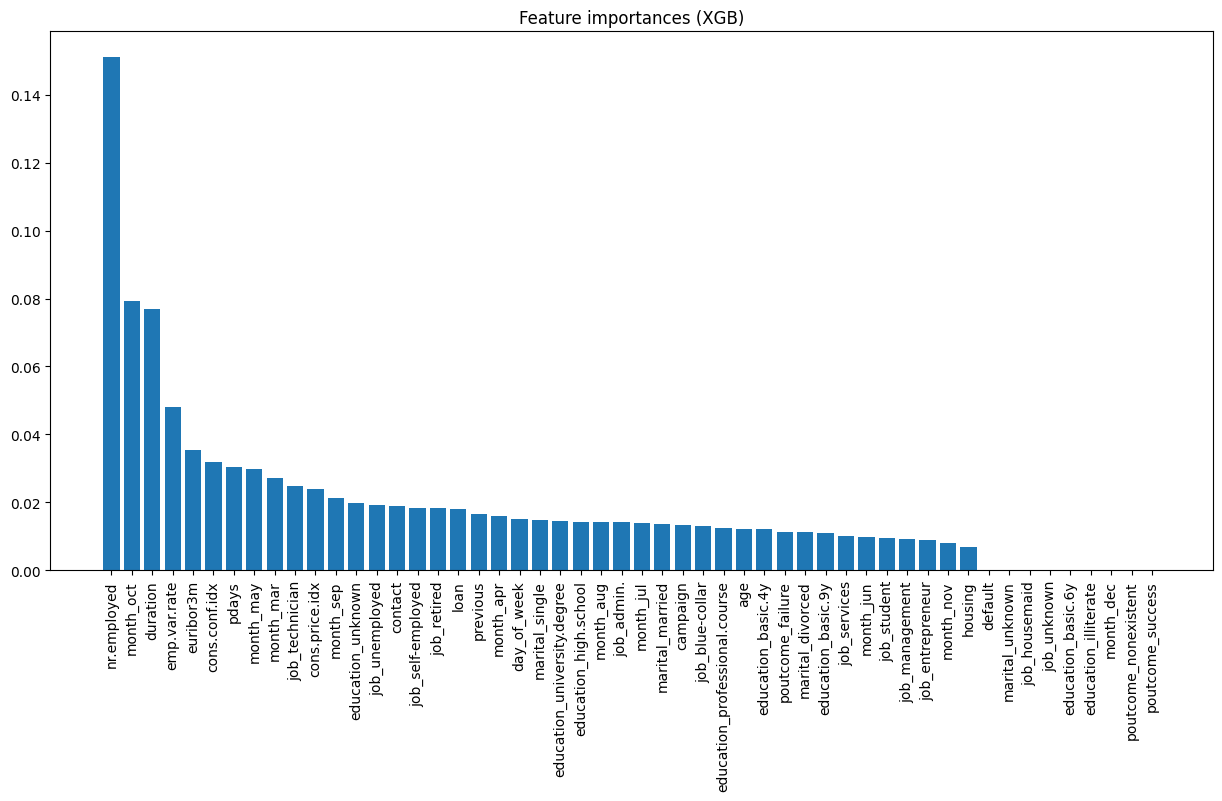

In [ ]:
#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X_train.columns, model_xgb.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns = headers)

#plot feature importances
fig = plt.figure(figsize=(15,7))
x_pos = np.arange(0, len(xgb_feature_importances))
plt.bar(x_pos, xgb_feature_importances['score'])
plt.xticks(x_pos, xgb_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances (XGB)')

plt.show()

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,model_xgb.predict(X_test))
cm

array([[140,  27],
       [ 21, 146]], dtype=int64)

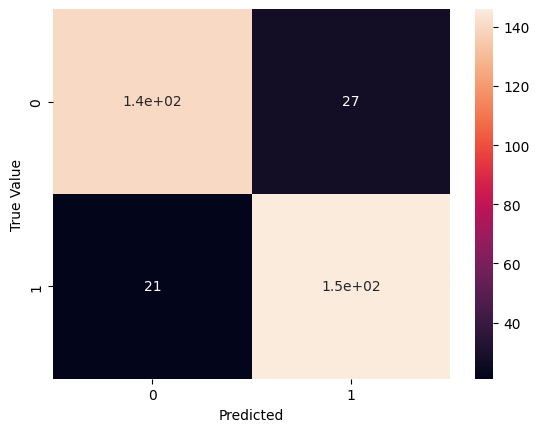

In [ ]:
#plot the graph
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()